
```

       action a ~ pi(s)
       --------------->
       |              |
agent  |              |. world
       |              |
       <---------------
        reward r'
        next state s' ~ p(s,a,s')

the predicted value of state s is the maximum value of expected return of any action.

the predicted value of action a at state s is the expected reward plus the maximum return of any action.

- MC for episodic case
N[s] = N[s] + 1
V[s] = V[s] + ([Gt - V[s]) / N[s]
for evaluation

- TD(0) for general case
V[s] = V[s] + alpha * (r + gamma * V[s'] - V[s])
for evaluation

- TD(lambda) for general case
V[s] = V[s] + alpha * (Gt - V[s])
Gt = (1-lambda)Gt1 + (1-lambda)*lambda*Gt2 + ...
Gt1 = r + gamma*V[s']
Gt2 = r + gamma*r' + gamma**2 * v[s'']
Gt3 = r + gamma*r' + gamma**2 * r'' + gamma**3 * v[s''']
for evalution

- Q learning
Q[s,a] = Q[s,a] + alpha * (r + gamma* max(Q(s',a') for a') - Q[s,a])
for evaluation, control

def Q_learn(s,a,r,s',Q)
    td_target = r + gamma * max(Q(s',a')) for any a'
    td_error = td_target - Q(s,a)
    Q(s,a) += alpha * td_error

```
    

In [ ]:
import numpy as np

# Q
q = np.matrix(np.zeros([6, 6]))

# Reward
r = np.matrix([
[-1, -1, -1, -1,  0,  -1],
[-1, -1, -1,  0, -1, 100],
[-1, -1, -1,  0, -1,  -1],
[-1,  0,  0, -1,  0,  -1],
[ 0, -1, -1,  0, -1, 100],
[-1,  0, -1, -1,  0, 100]])

alpha = 0.5
gamma = 0.8
epsilon = 0.4

# the main training loop
for episode in range(101):
  # random initial state
  state = np.random.randint(0, 6)
  # if not final state
  while (state != 5):
    # choose a possible action
    # Even in random case, we cannot choose actions whose r[state, action] = -1.
    possible_actions = []
    possible_q = []
    for action in range(6):
      if r[state, action] >= 0:
        possible_actions.append(action)
        possible_q.append(q[state, action])
    # Step next state, here we use epsilon-greedy algorithm.
    action = -1
    if np.random.random() < epsilon:
      # choose random action
      action = possible_actions[np.random.randint(0, len(possible_actions))]
    else:
      # greedy
      action = possible_actions[np.argmax(possible_q)]
    # Update Q value
    q[state, action] += r[state, action] + gamma * q[action].max() - q[state, action]
    # Go to the next state
    state = action
  # Display training progress
  if episode % 10 == 0:
    print("------------------------------------------------")
    print("Training episode: %d" % episode)
    print(q)

------------------------------------------------
Training episode: 0
[[  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]
------------------------------------------------
Training episode: 10
[[  0.   0.   0.   0.  80.   0.]
 [  0.   0.   0.  64.   0. 100.]
 [  0.   0.   0.  64.   0.   0.]
 [  0.  80.   0.   0.  80.   0.]
 [  0.   0.   0.   0.   0. 100.]
 [  0.   0.   0.   0.   0.   0.]]
------------------------------------------------
Training episode: 20
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [ 64.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.    0.    0.    0. ]]
------------------------------------------------
Training episode: 30
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    

```
DQN for carpole
link: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

design
agent
policy network
  __call__(state) -> [q(s,a1), ...]
target network
  __call__(state) -> {q(s,a1), ...]

env
state := pos, speed, angle, angular speed
action := left, right
reset() -> initial state
step(action) -> reward, new state, terminated, stopped


train
hyperparameters
  epsilon
  batch_size
  tao
  gamma
  lr

experience_history
loss_function
optimizer

for each episode
  state = env.reset()
  while True:
    # agent act
    if random.rand() < epsilon:
      action = env.action_space.random()
    else:
      action = policy(state).argmax()

    # environment respond
    reward, new_state, terminated, stopped = env.step(action)
    experience_history.append(state, action, reward, new_state, terminated)
    
    
    # train
    train_states,train_actions,train_rewards,train_new_states,train_terminated
      = experience_history.sample(batch_size)
    
    target_qs = train_rewards + gamma * target_network(train_new_states)
    pred_qs = policy_network(train_states)

    loss = loss_function(pred_qs, target_qs)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # update target policy
    target_network.state_dict +=
         tao * (policy_network.state_dict - target_network.state_dict)

    if terminated or stopped:
       break
  
```

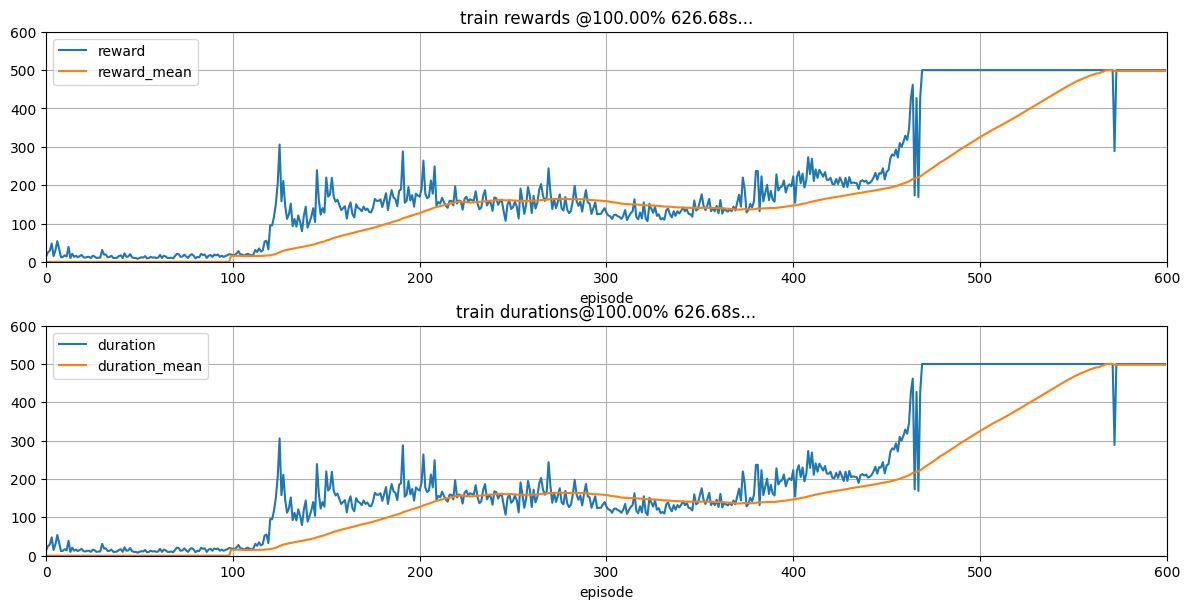

In [141]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, deque
from itertools import count
import math,random
import gymnasium as gym
from itertools import count
import time

if 'inline' in matplotlib.get_backend():
  from IPython import display
plt.ioff()
plt.figure(figsize=(12,6))

def show_progress(episode_rewards, episode_durations, run_len, num_episodes, elapsed_time_sec):
  plt.clf()

  plt.subplot(211)
  plt.tight_layout()
  plt.grid(True)
  plt.xlabel('episode')
  plt.xlim(0,num_episodes)
  plt.ylim(0,600)
  plt.plot(episode_rewards, label='reward')
  if run_len <= len(episode_rewards):
    plt.plot(torch.cat([torch.zeros(run_len-1),
                        torch.tensor(episode_rewards,dtype=torch.float).unfold(0, run_len, 1).mean(-1)]),
            label='reward_mean')
  plt.title(f'train rewards @{len(episode_rewards)/num_episodes*100:.2f}% {elapsed_time_sec:.2f}s...')
  plt.legend()

  plt.subplot(212)
  plt.tight_layout()
  plt.grid(True)
  plt.xlabel('episode')
  plt.xlim(0,num_episodes)
  plt.ylim(0,600)
  plt.plot(episode_durations, label='duration')
  if run_len <= len(episode_durations):
    plt.plot(torch.cat([torch.zeros(run_len-1),
                        torch.tensor(episode_durations,dtype=torch.float).unfold(0, run_len, 1).mean(-1)]),
             label='duration_mean')
  plt.title(f'train durations@{len(episode_durations)/num_episodes*100:.2f}% {elapsed_time_sec:.2f}s...')
  plt.legend()

  display.clear_output(wait=True)
  display.display(plt.gcf())

device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

env = gym.make("CartPole-v1")

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'terminated'))

class ExperienceHistory():
  def __init__(self, max_history):
    self.data = deque([], maxlen=max_history)

  def append(self, *args):
    self.data.append(Transition(*args))

  def sample(self, batch_size):
    return random.sample(self.data, batch_size)


class DQN(nn.Module):
  def __init__(self, len_state, num_hidden, len_action):
    super(DQN, self).__init__()
    self.ln1 = nn.Linear(len_state, num_hidden)
    self.relu1 = nn.ReLU()
    self.ln2 = nn.Linear(num_hidden, num_hidden)
    self.relu2 = nn.ReLU()
    self.ln3 = nn.Linear(num_hidden, len_action)

  def forward(self,x):
    x = self.relu1(self.ln1(x))
    x = self.relu2(self.ln2(x))
    return self.ln3(x)

# hyperparamers
max_history = 10000
len_state = env.observation_space.shape[0]
num_hidden = 128
len_action = env.action_space.n
learning_rate = 1e-4
num_episodes = 600
epsilon = {'start':1.0, 'end':0.05, 'decay':1000}
gamma = 0.99
batch_size = 128
tau = 5e-3

# agent
policy_net = DQN(len_state, num_hidden, len_action)
target_net = DQN(len_state, num_hidden, len_action)
target_net.load_state_dict(policy_net.state_dict())

history = ExperienceHistory(max_history)
loss_fn = nn.SmoothL1Loss()
optimizer = torch.optim.AdamW(policy_net.parameters(), lr=learning_rate, amsgrad=True)
episode_rewards = []
episode_durations = []
run_len = 100

start_time = time.time()
def train():
  counter_steps = 0
  for k in range(num_episodes):
    state, _ = env.reset()
    episode_reward = 0
    for step in count(0,1):
      # agent act
      counter_steps += 1
      if random.random() < epsilon['end'] + (epsilon['start'] - epsilon['end']) * np.exp(-1 * counter_steps / epsilon['decay']):
        action = env.action_space.sample().item()
      else:
        with torch.no_grad():
          action = policy_net(torch.tensor(state)).max(dim=0).indices.item()
      # env respond
      new_state, reward, terminated, truncated, info = env.step(action)
      episode_reward += reward
      history.append(state, action, new_state, reward, terminated) # experience history

      # train
      if len(history.data) >= batch_size:
        transitions = history.sample(batch_size)
        states, actions, new_states, rewards, terminateds = list(zip(*transitions))

        states = torch.tensor(states)
        actions = torch.tensor(actions)
        new_states = torch.tensor(new_states)
        rewards = torch.tensor(rewards)
        terminateds = torch.tensor(terminateds)

        # targets
        with torch.no_grad():
          q_target = rewards + gamma * target_net(new_states).max(dim=1).values.masked_fill(terminateds, 0)

        # preds
        q_pred = policy_net(states).gather(1, actions.view(-1,1)).view(-1)

        # optimize
        loss = loss_fn(q_pred, q_target)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
        optimizer.step()

      # update target
      target_state_dict = target_net.state_dict()
      policy_state_dict = policy_net.state_dict()
      for key in policy_state_dict:
        target_state_dict[key] += tau * (policy_state_dict[key] - target_state_dict[key])
      target_net.load_state_dict(target_state_dict)

      if terminated or truncated:
        break
      else:
        state = new_state

    episode_rewards.append(episode_reward)
    episode_durations.append(step+1)

    if (k+1) % 10 == 0:
      print(k, episode_reward)
      show_progress(episode_rewards, episode_durations, run_len, num_episodes, time.time()-start_time)

train()
#plt.plot(episode_rewards)

Complete


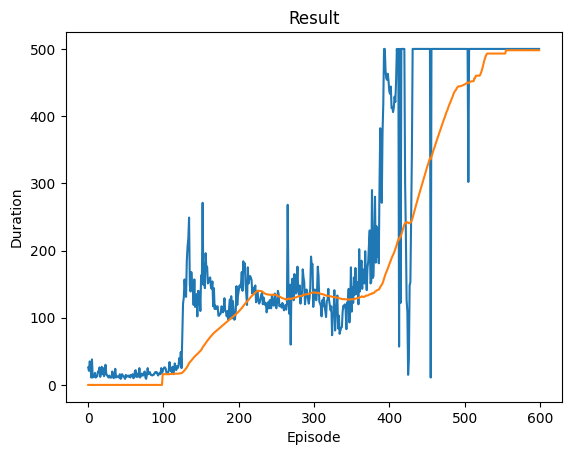

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [137]:
# reference implementation at https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
import gymnasium as gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

env = gym.make("CartPole-v1")

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)


class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

# Get number of actions from gym action space
n_actions = env.action_space.n
# Get the number of state observations
state, info = env.reset()
n_observations = len(state)

policy_net = DQN(n_observations, n_actions).to(device)
target_net = DQN(n_observations, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)
memory = ReplayMemory(10000)


steps_done = 0

def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return the largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1).indices.view(1, 1)
    else:
        return torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations(show_result=False):
    plt.figure(1, figsize=(12,4))
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1).values
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1).values
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

if torch.cuda.is_available() or torch.backends.mps.is_available():
    num_episodes = 600
else:
    num_episodes = 600#50

for i_episode in range(num_episodes):
    # Initialize the environment and get its state
    state, info = env.reset()
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    for t in count():
        action = select_action(state)
        observation, reward, terminated, truncated, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated

        if terminated:
            next_state = None
        else:
            next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        # Soft update of the target network's weights
        # θ′ ← τ θ + (1 −τ )θ′
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict:
            target_net_state_dict[key] = policy_net_state_dict[key]*TAU + target_net_state_dict[key]*(1-TAU)
        target_net.load_state_dict(target_net_state_dict)

        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()